# 📘 Credit Card Spending Habits in India — Data Analysis 

🔍 Exploratory Data Analysis:  📊 Business Insights | 🎨 Visual Insights

Dataset: Kaggle - https://www.kaggle.com/datasets/thedevastator/analyzing-credit-card-spending-habits-in-india

📌 Objective:
To analyze consumer spending behavior by examining the type and amount of expenses made based on gender and city. This helps uncover trends in how different demographics allocate their financial resources, providing actionable insights for business strategy.

**Tools:** Python, Pandas, Seaborn, Matplotlib

## Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Data Collection

In [2]:
# importing our data using pandas
dataset = pd.read_csv('data/Credit card transactions - India - Simple.csv')

## Data Cleansing

In [3]:
# Understanding our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [4]:
# Checking for null values
dataset.isnull().any() 

index        False
City         False
Date         False
Card Type    False
Exp Type     False
Gender       False
Amount       False
dtype: bool

From the looks of it our data has no null values but the date format is wrong in the Date column and the index column is unnecessary.

In [5]:
# Removing the index column before it isn't needed.
dataset.drop(columns=['index'],inplace=True)


In [6]:
# Converting the Date column to the right format
dataset['Date'] = pd.to_datetime(dataset['Date'] , format='mixed')


In [7]:
# Replace f with female and M with male in the Gender column to make table more understandable.
dataset['Gender'] = dataset['Gender'].str.replace('F','Female',regex=True)
dataset['Gender'] = dataset['Gender'].str.replace('M','Male',regex=True)

,City,Date,Card Type,Exp Type,Gender,Amount
0,"Delhi, India",2014-10-29,Gold,Bills,Female,82475
1,"Greater Mumbai, India",2014-08-22,Platinum,Bills,Female,32555
2,"Bengaluru, India",2014-08-27,Silver,Bills,Female,101738
3,"Greater Mumbai, India",2014-04-12,Signature,Bills,Female,123424
4,"Bengaluru, India",2015-05-05,Gold,Bills,Female,171574


In [8]:
# Splitting the city column to city column and country column to make data analysis easier
dataset[['City','Country']] = dataset['City'].str.split(',',expand=True)

In [9]:
dataset.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Country
0,Delhi,2014-10-29,Gold,Bills,Female,82475,India
1,Greater Mumbai,2014-08-22,Platinum,Bills,Female,32555,India
2,Bengaluru,2014-08-27,Silver,Bills,Female,101738,India
3,Greater Mumbai,2014-04-12,Signature,Bills,Female,123424,India
4,Bengaluru,2015-05-05,Gold,Bills,Female,171574,India


✅ **The dataset is now clean, with no missing values or formatting issues.**

# Exploratory Data Analysis

## Business Insight Questions

In [10]:
dataset.head(10)

,City,Date,Card Type,Exp Type,Gender,Amount,Country
0,Delhi,2014-10-29,Gold,Bills,Female,82475,India
1,Greater Mumbai,2014-08-22,Platinum,Bills,Female,32555,India
2,Bengaluru,2014-08-27,Silver,Bills,Female,101738,India
3,Greater Mumbai,2014-04-12,Signature,Bills,Female,123424,India
4,Bengaluru,2015-05-05,Gold,Bills,Female,171574,India
5,Delhi,2014-09-08,Silver,Bills,Female,100036,India
6,Delhi,2015-02-24,Gold,Bills,Female,143250,India
7,Greater Mumbai,2014-06-26,Platinum,Bills,Female,150980,India
8,Delhi,2014-03-28,Silver,Bills,Female,192247,India
9,Delhi,2014-09-01,Platinum,Bills,Female,67932,India


### 1. What are the most common types of expenses overall?

In [11]:
dataset['Exp Type'].value_counts()

Exp Type
Food             5463
Fuel             5257
Bills            5078
Entertainment    4762
Grocery          4754
Travel            738
Name: count, dtype: int64

**Insight** : The most frequent expense category was **Food**, indicating that consumers spend most often on essential and recurring needs. It may also indicate opportunities for strategic partnerships with restaurants, grocery stores, or food delivery services.

### 2. What is the Average amount spent per expense type?

In [12]:
dataset.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Country
0,Delhi,2014-10-29,Gold,Bills,Female,82475,India
1,Greater Mumbai,2014-08-22,Platinum,Bills,Female,32555,India
2,Bengaluru,2014-08-27,Silver,Bills,Female,101738,India
3,Greater Mumbai,2014-04-12,Signature,Bills,Female,123424,India
4,Bengaluru,2015-05-05,Gold,Bills,Female,171574,India


In [13]:
dataset.groupby('Exp Type')['Amount'].mean()

Exp Type
Bills            178627.899370
Entertainment    152548.831583
Food             150965.405272
Fuel             150111.436371
Grocery          151074.447413
Travel           148042.833333
Name: Amount, dtype: float64

**Insight** : **Bills** had the highest average expense per transaction, suggesting they involve larger, essential payments (e.g., rent or utilities). In contrast, **Food** is more frequent but involves smaller individual amounts. This distinction between high-frequency and high-value categories is important for understanding consumer financial behavior — some expenses occur frequently (e.g., Food), while others involve larger amounts per instance (e.g., Bills).



### 3. What is the total Spending by Gender?

In [14]:
dataset.groupby('Gender')['Amount'].sum()

Gender
Female    2205311030
Male      1869522343
Name: Amount, dtype: int64

**Insight** : **Females** had a higher total spending amount than **males**, indicating they are the dominant contributors to overall expenses. This could inform targeted marketing or financial product offerings aimed at female consumers.

### 4. What is the top 3 Expense Categories per Gender.

In [15]:
dataset.groupby('Gender')['Exp Type'].value_counts()

Gender  Exp Type     
Female  Food             3012
        Bills            2860
        Fuel             2617
        Grocery          2428
        Entertainment    2384
        Travel            379
Male    Fuel             2640
        Food             2451
        Entertainment    2378
        Grocery          2326
        Bills            2218
        Travel            359
Name: count, dtype: int64

**Insight**: The top 3 expense categories for females are **Food**, **Bills**, **Fuel**, while for males are **Fuel**, **Food**, **Entertainment**. This suggests that females may prioritize essential and domestic-related spending slightly more, whereas males show relatively higher spending on Fuel and Entertainment, indicating possible differences in mobility and leisure preferences.

### 5. What are the High-value expenses by gender ?



In [16]:
dataset.groupby('Gender')['Amount'].max()

Gender
Female    998077
Male      299981
Name: Amount, dtype: int64

**Insight** : The highest single expense recorded for females was 998,077, significantly higher than the 299,981 maximum for males. This suggests that females are more likely to make large, high-value transactions in this dataset.

### 6. What is the City with the Most Transactions ?

In [17]:
dataset.head()

,City,Date,Card Type,Exp Type,Gender,Amount,Country
0,Delhi,2014-10-29,Gold,Bills,Female,82475,India
1,Greater Mumbai,2014-08-22,Platinum,Bills,Female,32555,India
2,Bengaluru,2014-08-27,Silver,Bills,Female,101738,India
3,Greater Mumbai,2014-04-12,Signature,Bills,Female,123424,India
4,Bengaluru,2015-05-05,Gold,Bills,Female,171574,India


In [18]:
dataset['City'].value_counts().head()


City
Bengaluru         3552
Greater Mumbai    3493
Ahmedabad         3491
Delhi             3482
Hyderabad          784
Name: count, dtype: int64

**Insight** : **Bengaluru** recorded the highest number of transactions, followed closely by **Greater Mumbai, Ahmedabad, and Delhi**. This indicates that major urban centers are key hubs of consumer activity, likely due to their larger populations, higher income levels, and access to services. Targeting these cities with promotions or credit offers could maximize customer engagement.

### 7. Which City has the Highest Total Spending

In [19]:
dataset.groupby('City')['Amount'].sum().sort_values(ascending=False).head()


City
Greater Mumbai    576751476
Bengaluru         572326739
Ahmedabad         567794310
Delhi             556929212
Kolkata           115466943
Name: Amount, dtype: int64

**Insight** : **Greater Mumbai** had the highest total spending, closely followed by **Bengaluru, Ahmedabad, and Delhi**. While Bengaluru had the most transactions, Greater Mumbai led in total value, indicating that consumers there may spend more per transaction on average. This suggests Greater Mumbai could be a key market for high-value financial products or premium credit card offerings.



### 8. What is Most Common Expense Type in Top 3 Cities?

In [20]:
# We would be considering the top 3 cities according to the top 3 countries with the most transactions.
top_cities_by_spending = dataset[ dataset['City'].isin(['Greater Mumbai' , 'Bengaluru' ,'Ahmedabad']) ]
top_cities_by_spending.groupby('City')['Exp Type'].value_counts()

City            Exp Type     
Ahmedabad       Food             801
                Fuel             760
                Bills            680
                Grocery          628
                Entertainment    622
Bengaluru       Food             805
                Fuel             780
                Bills            735
                Entertainment    624
                Grocery          608
Greater Mumbai  Fuel             762
                Food             742
                Bills            728
                Grocery          647
                Entertainment    614
Name: count, dtype: int64

* **Insight** : In the top three cities by total spending, **Ahmedabad** and **Bengaluru** had Food as the most frequent expense type. In **Greater Mumbai, Fuel** was the most common expense, slightly ahead of Food. This suggests a consistent trend of essential spending (Food, Fuel, Bills) across major cities, with **Greater Mumbai showing a higher emphasis on mobility or transportation-related expenses**

### 9. What is the Gender Spending by City ?

In [21]:
dataset.groupby(['City','Gender'])['Amount'].sum().sort_values(ascending=False)

City            Gender
Greater Mumbai  Female    337617046
Bengaluru       Female    331198446
Delhi           Female    323692299
Ahmedabad       Female    319172275
                Male      248622035
                            ...    
Dhoraji         Male           5159
Titlagarh       Female         4675
Ambejogai       Male           4348
Uravakonda      Female         4131
Bahraich        Female         1243
Name: Amount, Length: 1876, dtype: int64

**Insight** : In the top-spending cities such as **Greater Mumbai, Bengaluru, Delhi, and Ahmedabad**, females consistently spent more than males. This trend suggests that in urban centers, female consumers are the primary drivers of total credit card expenses. Understanding this can help the company design marketing campaigns, rewards programs, or financial products tailored to the spending behavior of female customers in key cities.

## Data Visualization : 

### 1. Most Common Expense Types

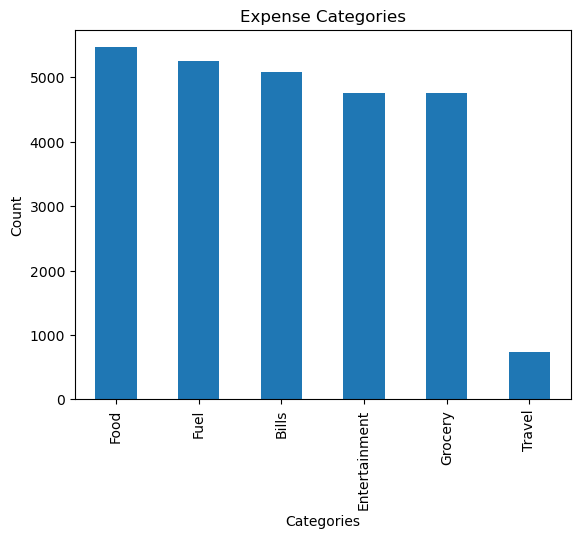

In [41]:
fig,ax = plt.subplots()
dataset['Exp Type'].value_counts().plot(ax=ax,kind='bar',
                                       title='Expense Categories',
                                       xlabel='Categories',
                                       ylabel='Count');
fig.savefig('images/expense_types')

### 2.  Average Amount per Expense Type

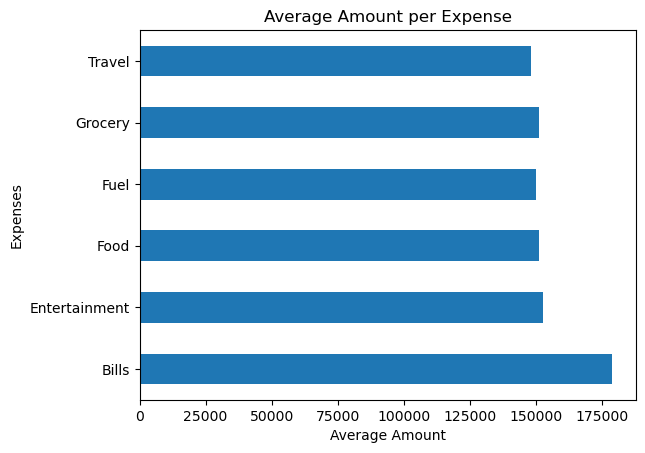

In [23]:
fig,ax = plt.subplots()
dataset.groupby('Exp Type')['Amount'].mean().plot(ax=ax,kind='barh',
                                                 title='Average Amount per Expense',
                                                 xlabel='Average Amount',
                                                 ylabel='Expenses');

### 3. Total Spending by Gender

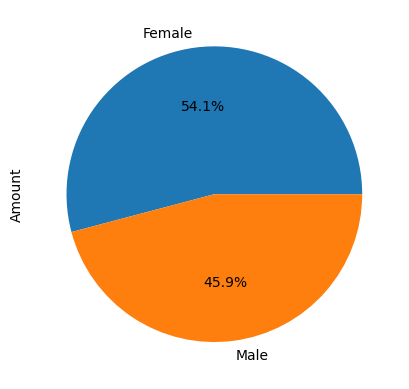

In [35]:
fig,ax = plt.subplots()
labels = ['Female','Male']
dataset.groupby('Gender')['Amount'].sum().plot(ax=ax,kind='pie',labels=labels, autopct='%1.1f%%');
fig.savefig('images/Total spending by Gender')

### 4. Top 3 Expense Types by Gender

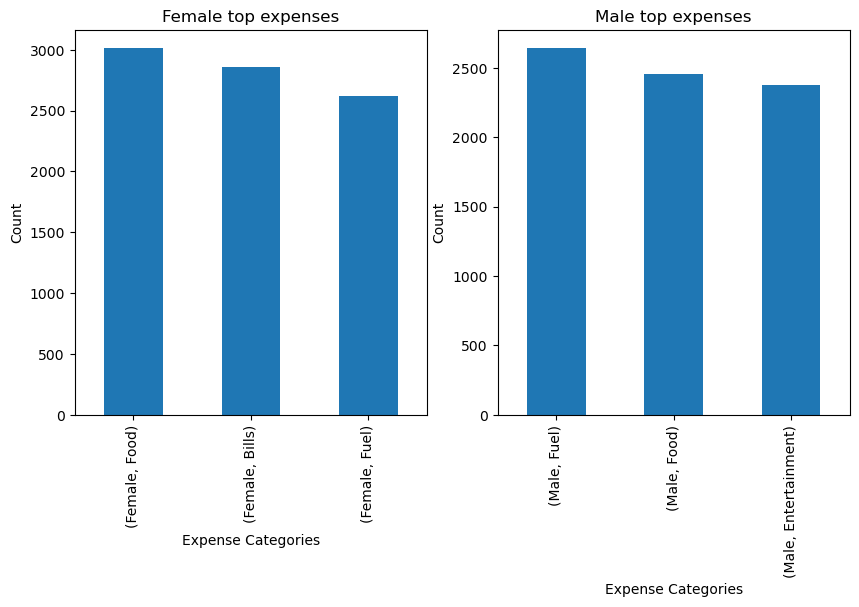

In [36]:
female_top_expenses = dataset.groupby('Gender')['Exp Type'].value_counts().iloc[:3]
male_top_expenses = dataset.groupby('Gender')['Exp Type'].value_counts().iloc[6:9]

fig,(ax0,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
female_top_expenses.plot(ax=ax0,kind='bar',title='Female top expenses',
                        xlabel='Expense Categories',
                        ylabel = 'Count')

male_top_expenses.plot(ax=ax1,kind='bar',title='Male top expenses',
                        xlabel='Expense Categories',
                        ylabel = 'Count');
fig.savefig('images/Top expenses by Gender')

### 5. Highest Single Expense by Gender


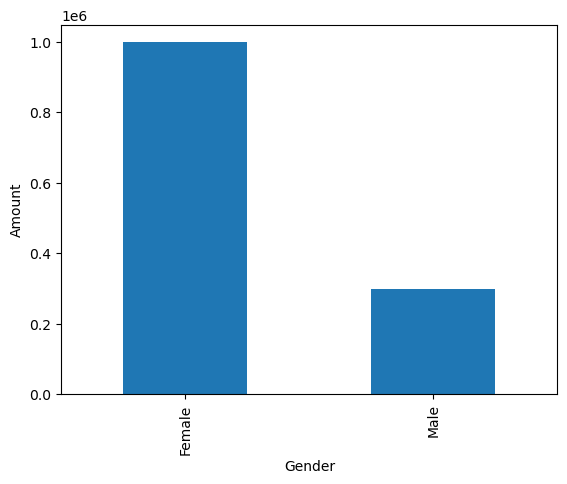

In [26]:
fig,ax = plt.subplots()
dataset.groupby('Gender')['Amount'].max().plot(ax=ax,kind='bar',
                                              ylabel='Amount',
                                              );

### 6. City with Most Transactions

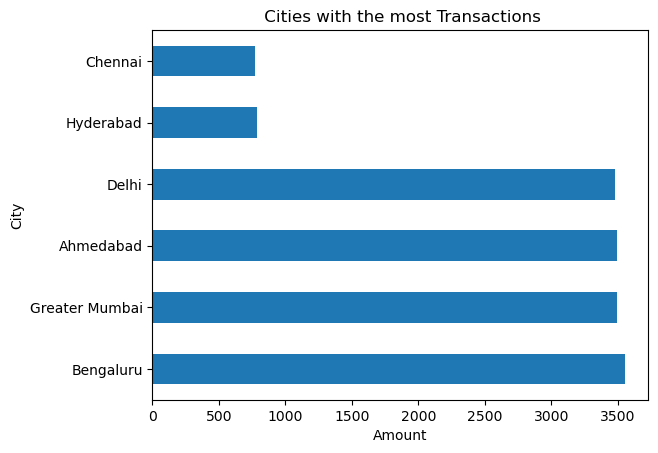

In [27]:
fig,ax = plt.subplots()
dataset['City'].value_counts().iloc[:6].plot(ax=ax,kind='barh',
                                title=' Cities with the most Transactions',
                                            xlabel='Amount');

### 7. City with Highest Total Spending


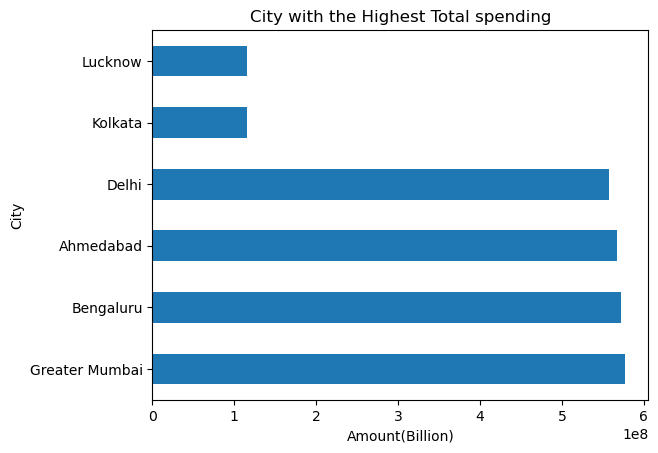

In [42]:
fig,ax = plt.subplots()
dataset.groupby('City')['Amount'].sum().sort_values(ascending=False).iloc[:6].plot(ax=ax,kind='barh',
                                                                                  title='City with the Highest Total spending'
                                                                                  ,xlabel='Amount(Billion)');
fig.savefig('images/top_cities')

### 8. Most Common Expense Type in Top 3 Cities


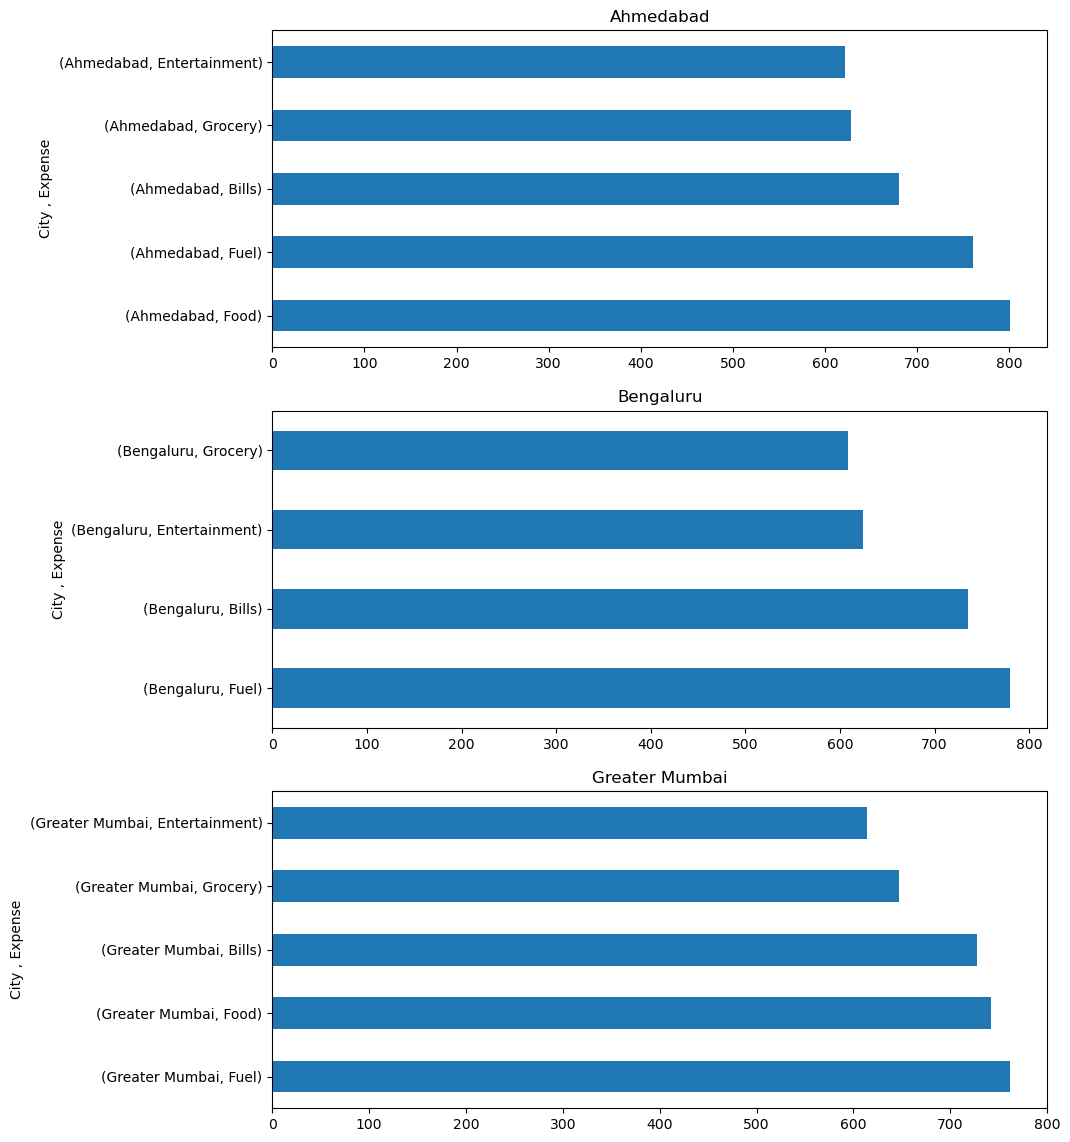

In [37]:
fig,(ax0,ax1,ax2) = plt.subplots(nrows=3,ncols=1,figsize=(10,14))

top_cities_by_spending.groupby('City')['Exp Type'].value_counts().iloc[:5].plot(ax=ax0,kind='barh',
                                                                               title='Ahmedabad',
                                                                               ylabel='City , Expense',
                                                                               )

top_cities_by_spending.groupby('City')['Exp Type'].value_counts().iloc[6:10].plot(ax=ax1,kind='barh',title='Bengaluru',
                                                                               ylabel='City , Expense',)
top_cities_by_spending.groupby('City')['Exp Type'].value_counts().iloc[10:].plot(ax=ax2,kind='barh',title='Greater Mumbai',
                                                                               ylabel='City , Expense',);
fig.savefig('images/Common Expense in Top cities')

### 9. Gender Spending by City


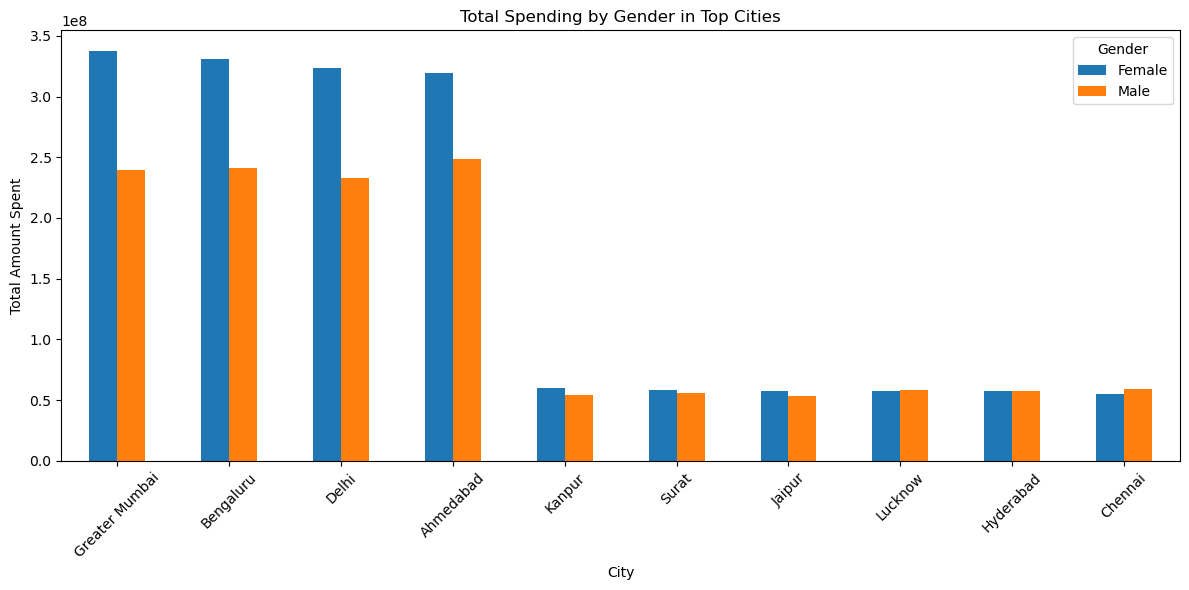

<Figure size 640x480 with 0 Axes>

In [40]:
# Group and reshape the data
gender_city_spend = dataset.groupby(['City', 'Gender'])['Amount'].sum().unstack()

# Sort by total spend to show top cities
gender_city_spend = gender_city_spend.sort_values(by=['Female', 'Male'], ascending=False).head(10)

# Plot
gender_city_spend.plot(kind='bar', figsize=(12, 6));

plt.title('Total Spending by Gender in Top Cities')
plt.xlabel('City')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()
plt.savefig('images/Total spending by Gender in Top Cities');

# Conclusion

## 🔍 Summary of Insights
- **Food** is the most frequent expense category across cities and genders.
- **Females** spend more in total and make higher single transactions than males.
- **Greater Mumbai** leads in total spending; **Bengaluru** has the highest number of transactions.
- In top cities, **Food** remains the most common expense type.
- Gender spending patterns vary slightly by city but show overall female dominance in spend volume.

## 📌 Business Recommendation
Financial institutions and marketing teams can use these insights to:
- Focus campaigns on food-related benefits and offers.
- Target high-spending cities like Greater Mumbai with premium card features.
- Consider gender-focused financial products, especially for urban female consumers.
